### Simple Linear Regression

In [30]:
import pandas as pd
import matplotlib.pyplot as plt


In [31]:
df = pd.read_csv("Advertising.csv")
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [32]:
df = df.iloc[:, 1:]
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


Descubrir los medios de publicidad que mas  ventas producen, para quedarnos con el medio que mas venta produzca, los demas seran eliminados.

In [34]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [35]:
nan = df.isnull().sum()
nan

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [36]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [37]:
cols = ['TV', 'Radio', 'Newspaper']

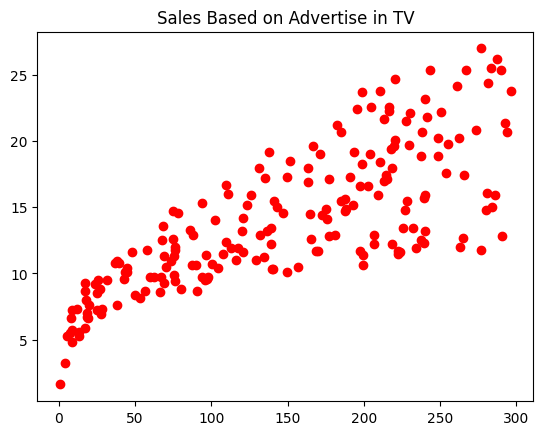

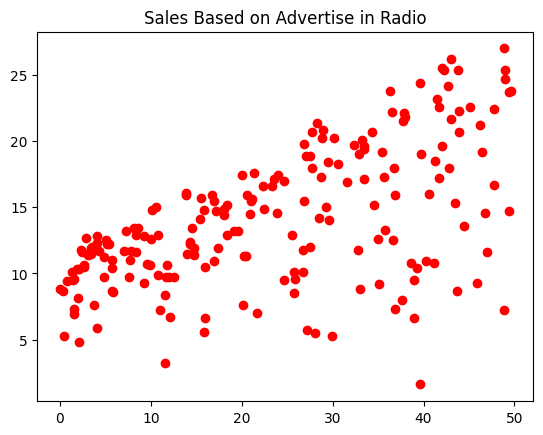

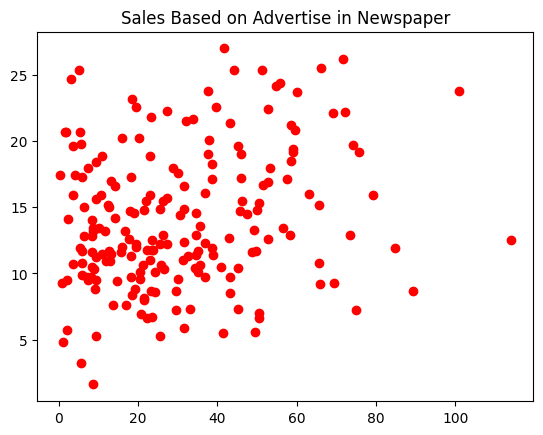

In [38]:
for col in cols:
    plt.plot(df[col], df['Sales'], 'ro')
    plt.title("Sales Based on Advertise in %s" % col)
    plt.show()    

### Documentation

* TV: The more we invest in tv more sales we get
* Radio: It has a high level of sales, but is too scattered
* NewsPaper: is too scattered

So, based on these plots, the best one is TV advertise.

#### Regression Model

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [40]:
## Using reshape function to organize our data
X = df['TV'].values.reshape(-1,1)
X

array([[230.1],
       [ 44.5],
       [ 17.2],
       [151.5],
       [180.8],
       [  8.7],
       [ 57.5],
       [120.2],
       [  8.6],
       [199.8],
       [ 66.1],
       [214.7],
       [ 23.8],
       [ 97.5],
       [204.1],
       [195.4],
       [ 67.8],
       [281.4],
       [ 69.2],
       [147.3],
       [218.4],
       [237.4],
       [ 13.2],
       [228.3],
       [ 62.3],
       [262.9],
       [142.9],
       [240.1],
       [248.8],
       [ 70.6],
       [292.9],
       [112.9],
       [ 97.2],
       [265.6],
       [ 95.7],
       [290.7],
       [266.9],
       [ 74.7],
       [ 43.1],
       [228. ],
       [202.5],
       [177. ],
       [293.6],
       [206.9],
       [ 25.1],
       [175.1],
       [ 89.7],
       [239.9],
       [227.2],
       [ 66.9],
       [199.8],
       [100.4],
       [216.4],
       [182.6],
       [262.7],
       [198.9],
       [  7.3],
       [136.2],
       [210.8],
       [210.7],
       [ 53.5],
       [261.3],
       [

In [41]:
y = df['Sales'].values
## Splitting the dataset into test_train                 # to adjust the qty of the data for train & test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
print(X_train.shape)
print(X_test.shape)

(160, 1)
(40, 1)


In [43]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [44]:
y_pred = lin_reg.predict(X_test)

In [45]:
print('Predictions: {}, Real: {}'.format(y_pred[:4], y_test[:4]))

Predictions: [14.71794394 16.2115484  20.74819743  7.66403631], Real: [16.9 22.4 21.4  7.3]


#### Documentation 1 

Concerning this result, I see this model is not good enough due to the prediction having a value of 14.71 and the real one having 16.9, this prediction laid on a lower value

In [46]:
#RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print('RMSE:', rmse)
## R2
print('R2:', r2_score(y_test, y_pred))

RMSE: 3.194472431998898
R2: 0.6766954295627077


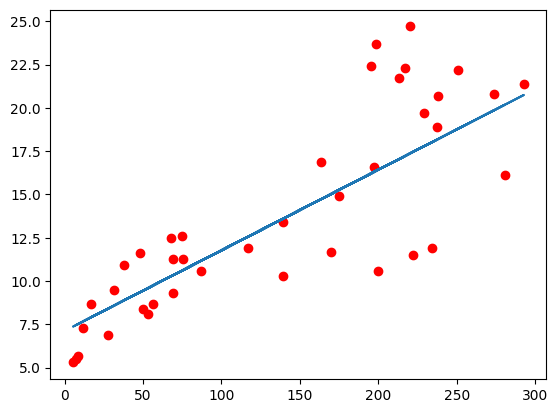

In [47]:
## Plotting results
plt.plot(X_test, y_test, 'ro')
plt.plot(X_test, y_pred)
plt.show()

#### Documentation (RMSE & R2)

To determine how good the prediction is, we need to compared the min value of our data (df.min()), the result of rmse is higher than the minimun. RMSE: 3.19. Sales(real data): 1.6.

Based on R2 results; the more closer to 1 the better is our model, in this case, the R2 result is 0.67 (is not either better or bad)

#### This function gonna be used for model testing over the following variable to find the best one for advertising, I'll try testing models in order to get the best result of RMSE

In [48]:
## Funtion to try different models      #new value
def simple_model(independent):
    X = df[independent].values.reshape(-1,1)
    y = df['Sales'].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) ## Testing set
    lin_reg = LinearRegression()
    lin_reg.fit(X_train, y_train)
    # Predict values
    y_pred = lin_reg.predict(X_test)
    print('Predictions: {}, Real: {}'.format(y_pred[:4], y_test[:4]))
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    print('RMSE:', rmse)
    print('R2:', r2_score(y_test, y_pred))
    ## Plotting 
    plt.plot(X_test, y_test, 'ro')
    plt.plot(X_test, y_pred)
    plt.show()

Predictions: [15.88332197 19.17427219 15.20877938 16.96667826], Real: [16.9 22.4 21.4  7.3]
RMSE: 4.8216974799471926
R2: 0.2634309396999791


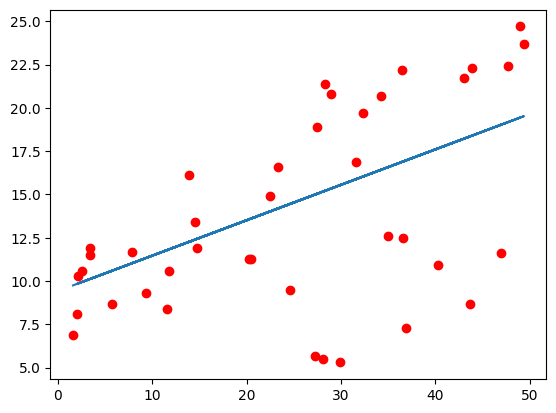

In [49]:
simple_model('Radio')

#### Newspaper is the worst one for advertisemnt

Predictions: [15.47167765 15.47167765 14.89203768 15.01155108], Real: [16.9 22.4 21.4  7.3]
RMSE: 5.533600454969853
R2: 0.029871749149522397


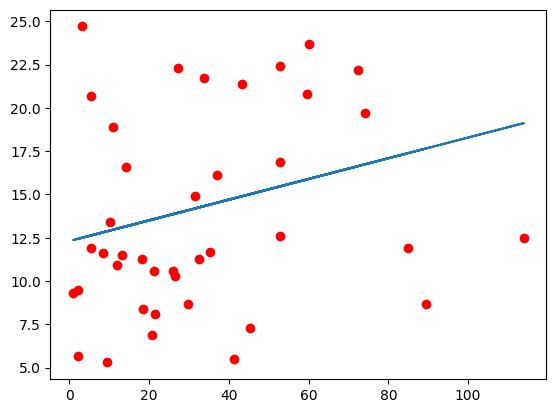

In [50]:
simple_model('Newspaper')

### Multiple Linear Regression

In [51]:
import seaborn as sns

Predictions: [16.00205249 17.4873792  21.45480309  8.555338  ], Real: [16.9 22.4 21.4  7.3]
RMSE: 3.3260422878644853
R2: 0.649515280538585


<AxesSubplot:>

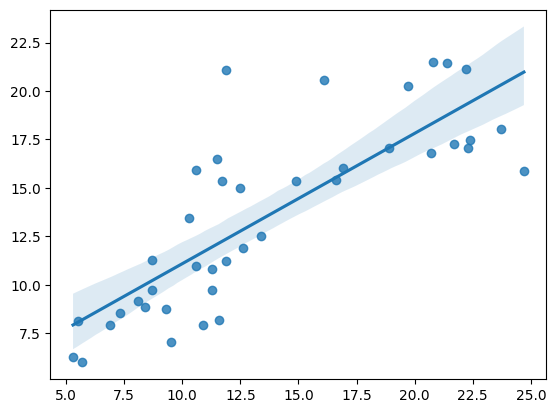

In [52]:
X = df.drop(['Radio', 'Sales'], axis=1).values
y = df['Sales'].values
    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) ## Testing set
    
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
    
# Predict values
y_pred = lin_reg.predict(X_test)
print('Predictions: {}, Real: {}'.format(y_pred[:4], y_test[:4]))
rmse = mean_squared_error(y_test, y_pred, squared=False)
print('RMSE:', rmse)
print('R2:', r2_score(y_test, y_pred))
## Plotting 
sns.regplot(x=y_test, y=y_pred)

Predictions: [16.35747252 20.86299397 21.52505848 10.58719845], Real: [16.9 22.4 21.4  7.3]
RMSE: 1.7714254173033517
R2: 0.9005833101920356


<AxesSubplot:>

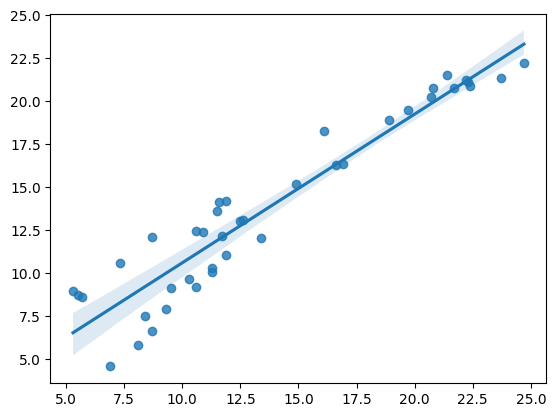

In [53]:
X = df.drop(['Newspaper', 'Sales'], axis=1).values
y = df['Sales'].values
    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) ## Testing set
    
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
    
# Predict values
y_pred = lin_reg.predict(X_test)
print('Predictions: {}, Real: {}'.format(y_pred[:4], y_test[:4]))
rmse = mean_squared_error(y_test, y_pred, squared=False)
print('RMSE:', rmse)
print('R2:', r2_score(y_test, y_pred))
## Plotting 
sns.regplot(x=y_test, y=y_pred)